In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('bank-additional.csv', sep=';')
rows = df.shape[0]
columns = df.shape[1]
print(f'There are {rows} instances and {columns} attributes in this dataset')

There are 4119 instances and 21 attributes in this dataset


In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,128.0,3.0,999,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,290.0,4.0,999,0.0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,44.0,2.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,68.0,1.0,999,1.0,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,NaN,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4114 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4117 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4116 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

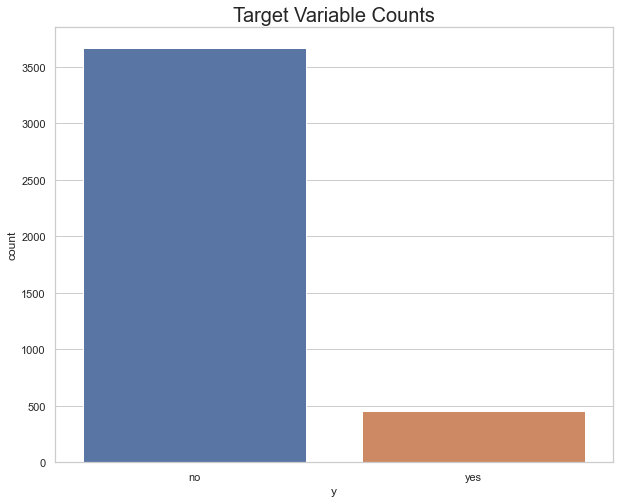

In [103]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x='y', data=df)
plt.title('Target Variable Counts', fontsize=20)
plt.show()

In [104]:
print(df['nr.employed'].isin(['no']).sum()/df.shape[0]*100)

0.024277737314882253


In [105]:
df['nr.employed'] = df['nr.employed'].replace('no', 0)

In [106]:
df['nr.employed'] = pd.to_numeric(df['nr.employed'])

In [107]:
df.drop(index = df.loc[df['nr.employed'] == 0].index, axis = 0, inplace = True)

In [108]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Let's see the values we have in categorical variables:

In [109]:
categorical_vars = ['job', 'marital', 'education', 'default', 'housing','loan','contact', 'month', 'day_of_week', 'poutcome']

In [110]:
df[categorical_vars].nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

In [111]:
for var in categorical_vars:
    print(f'{var}:'.title(), end = '\n\n')
    print(df[var].value_counts())
    print('-'* 50)

Job:

admin.           1012
blue-collar       883
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64
--------------------------------------------------
Marital:

married     2508
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64
--------------------------------------------------
Education:

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                428
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64
--------------------------------------------------
Default:

no         3314
unknown     803
yes           1
Name: default, dtype: int64
--------------------------------------------------
Housing:

yes        2175
no         1838
un

Missing and unknown data analysis

In [112]:
has_NA = df.isnull().any()
num_of_NAs = round(df.isnull().sum(0)/df.shape[0]*100, 3)
NAs_by_row = pd.concat([has_NA, num_of_NAs], axis = 1)
NAs_by_row

,0,1
age,False,0.000
job,False,0.000
marital,False,0.000
education,False,0.000
default,False,0.000
housing,False,0.000
loan,False,0.000
contact,False,0.000
month,False,0.000
day_of_week,False,0.000


In [113]:
NAs_table = df[df.isnull().any(1)]
NAs_table

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,NaN,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
117,53,services,married,high.school,unknown,no,no,telephone,may,thu,203.0,NaN,999,0.0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
149,40,admin.,divorced,university.degree,no,yes,no,cellular,aug,mon,NaN,1.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
181,42,entrepreneur,married,university.degree,no,yes,no,telephone,may,tue,154.0,1.0,999,0.0,nonexistent,NaN,93.994,-36.4,4.857,5191.0,no
212,32,technician,married,professional.course,no,no,no,cellular,jul,tue,711.0,1.0,999,0.0,nonexistent,1.4,NaN,-42.7,4.962,5228.1,no
245,45,blue-collar,divorced,basic.6y,unknown,yes,no,cellular,may,thu,219.0,1.0,999,0.0,nonexistent,-1.8,92.893,NaN,1.327,5099.1,no
279,23,entrepreneur,married,university.degree,no,yes,no,cellular,aug,thu,87.0,1.0,999,NaN,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
312,30,technician,married,university.degree,unknown,yes,no,telephone,may,wed,72.0,NaN,999,0.0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
344,51,unknown,married,unknown,unknown,yes,no,cellular,aug,fri,NaN,5.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
375,31,technician,single,professional.course,no,unknown,unknown,cellular,aug,mon,202.0,NaN,999,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [114]:
print(f'The complete number of NA rows is: {NAs_table.shape[0]}')

The complete number of NA rows is: 20


In [115]:
has_unknown = df.isin(['unknown']).any()
num_of_unknown = round(df.isin(['unknown']).sum()/df.shape[0]*100,2)
unknown_by_row = pd.concat([has_unknown, num_of_unknown], axis = 1)
unknown_by_row


,0,1
age,False,0.00
job,True,0.95
marital,True,0.27
education,True,4.06
default,True,19.50
housing,True,2.55
loan,True,2.55
contact,False,0.00
month,False,0.00
day_of_week,False,0.00


In [116]:
unknows_table = df[df.isin(['unknown']).any(axis = 1)]
unknows_table

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,44.0,2.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,NaN,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
10,25,services,single,basic.6y,unknown,yes,no,cellular,jul,thu,301.0,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
18,45,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,mon,38.0,2.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093,56,retired,married,basic.4y,unknown,no,no,cellular,jul,tue,580.0,3.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
4102,31,blue-collar,single,basic.9y,unknown,no,yes,telephone,jun,fri,70.0,2.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4105,47,housemaid,married,basic.4y,unknown,yes,no,telephone,jul,tue,159.0,2.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
4107,36,admin.,married,university.degree,unknown,yes,no,cellular,aug,wed,155.0,11.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no


In [117]:
print(f'The complete number of unknown rows is: {unknows_table.shape[0]}')

The complete number of unknown rows is: 1029


Data visualization

Function to add percentage level at the top of each rectangle:

In [118]:
def label_columns(ax):
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') 

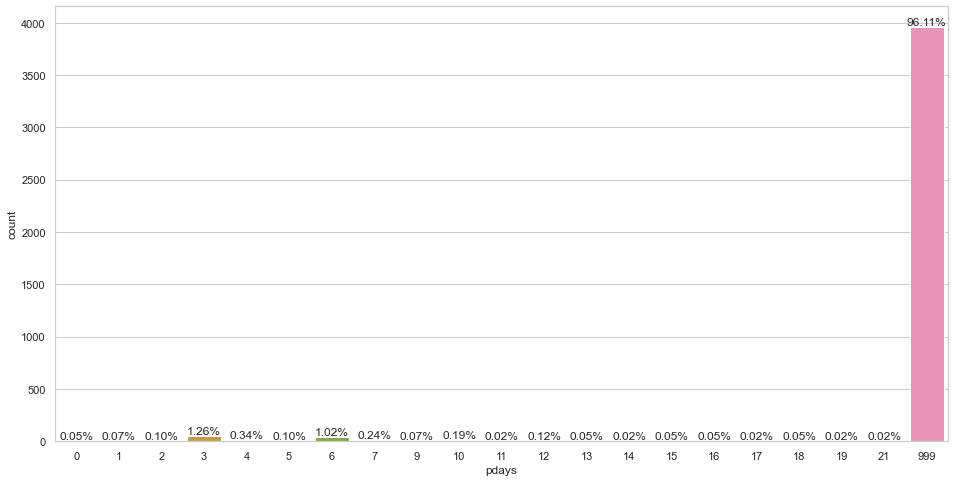

In [119]:
fig, ax = plt.subplots(figsize = (16,8))
sns.countplot(x = df['pdays'])
ncount = df.shape[0]
label_columns(ax)

Obzirom da 999 oznacava da klijent nikada nije kontaktiran u vezi stare promocije(i to je vecina, 96,11%), a ostali brojevi koliko dana je proslo od poslednjeg poziva za promociju kampanje, to nije bas intuitivno. 

Job


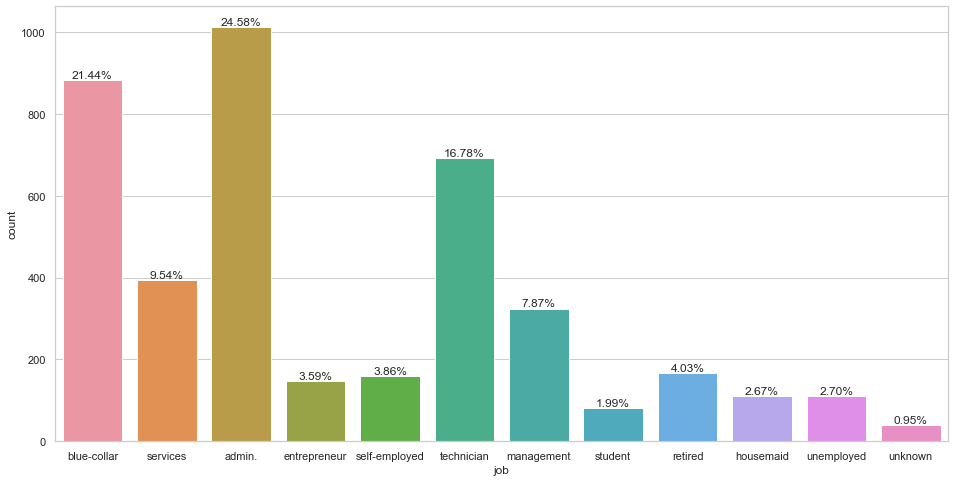

Marital


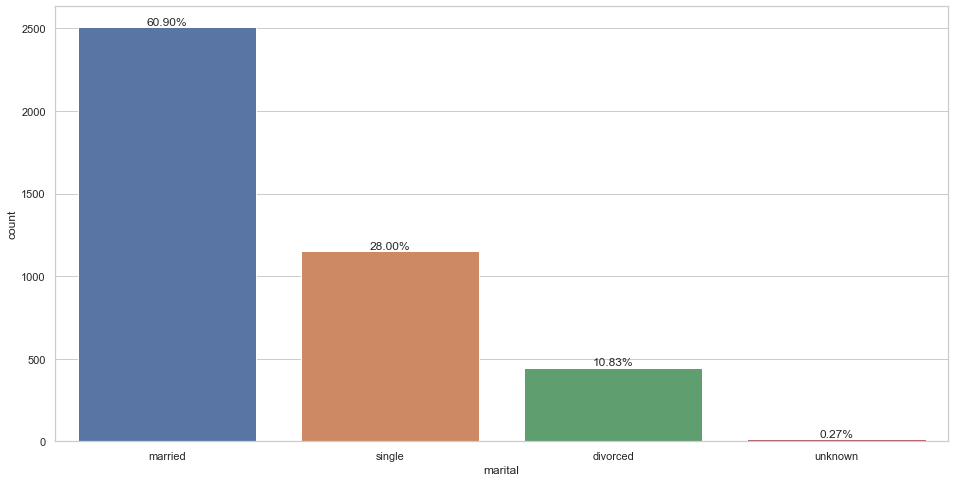

Education


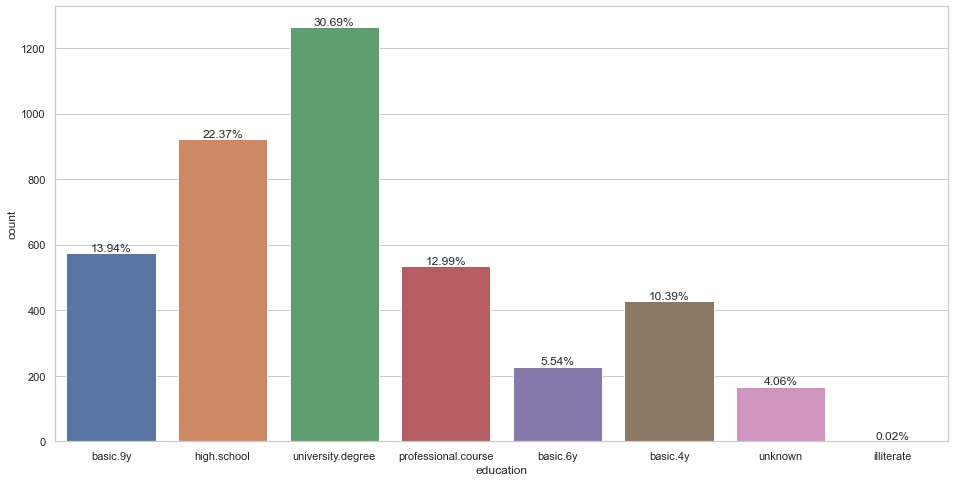

Default


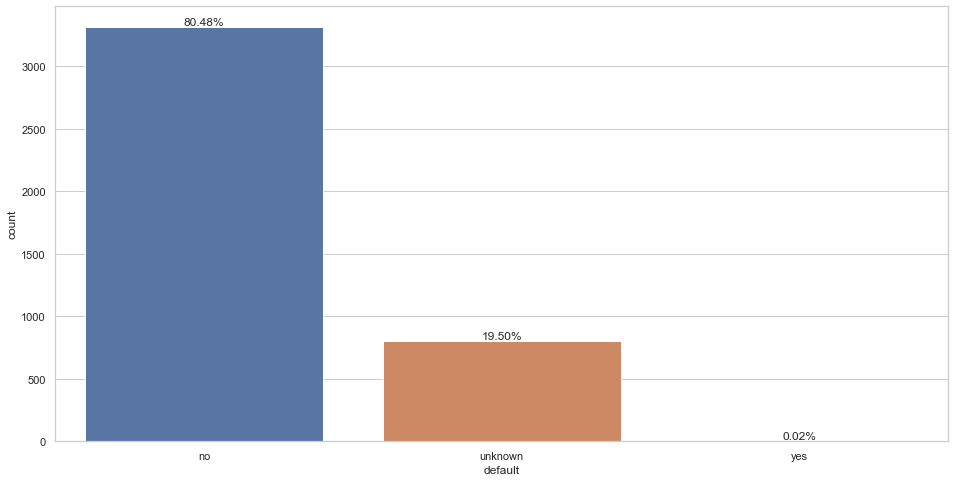

Housing


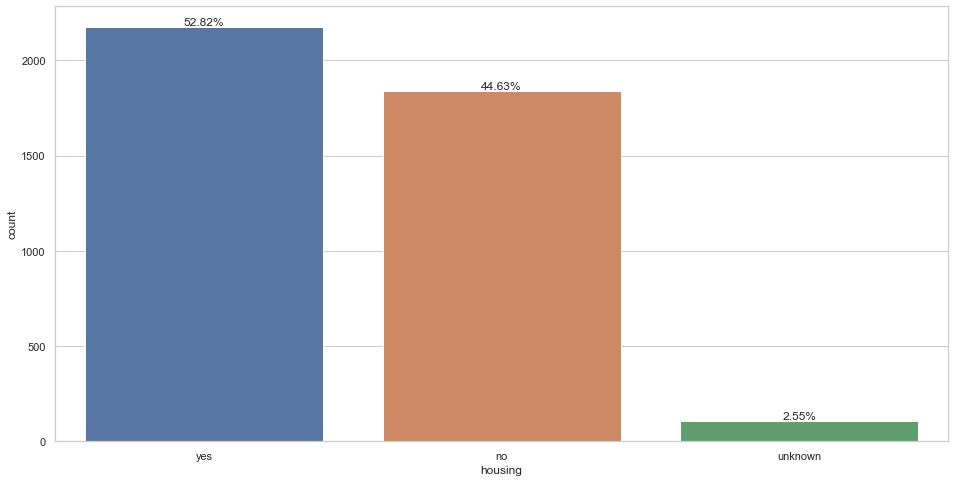

Loan


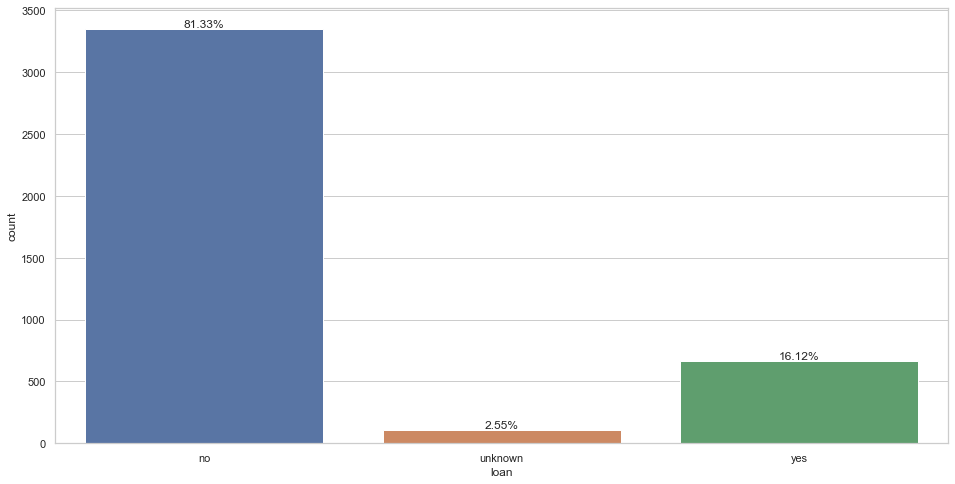

Contact


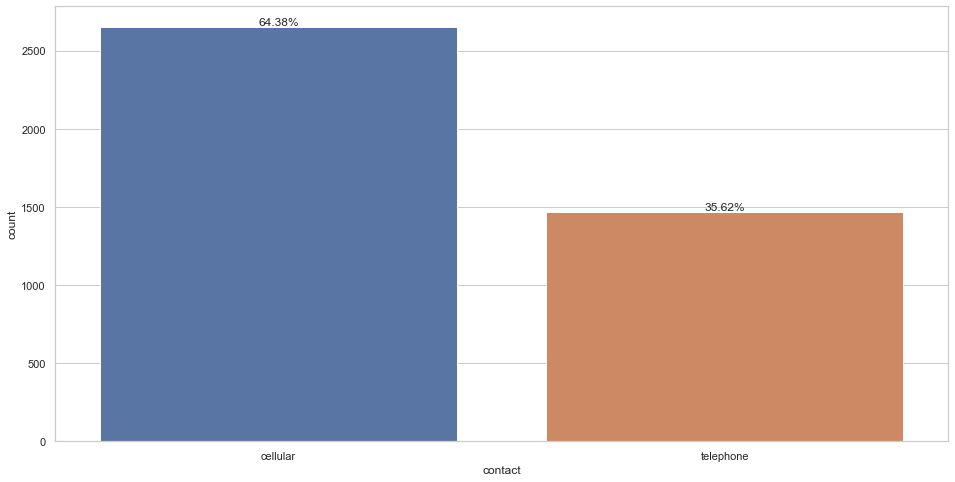

Month


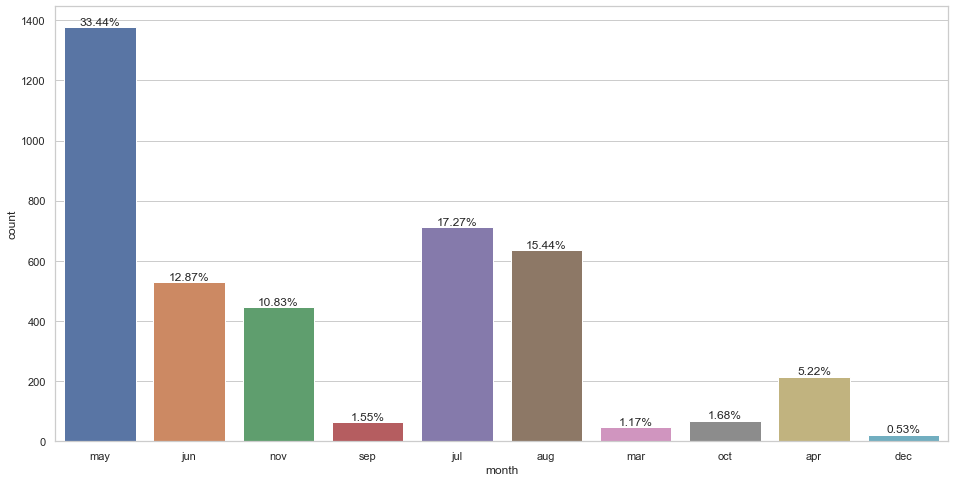

Day_Of_Week


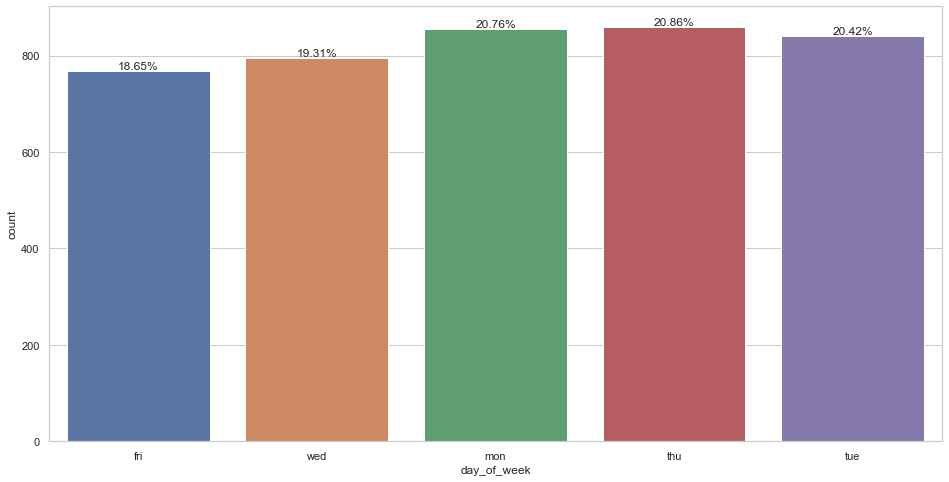

Poutcome


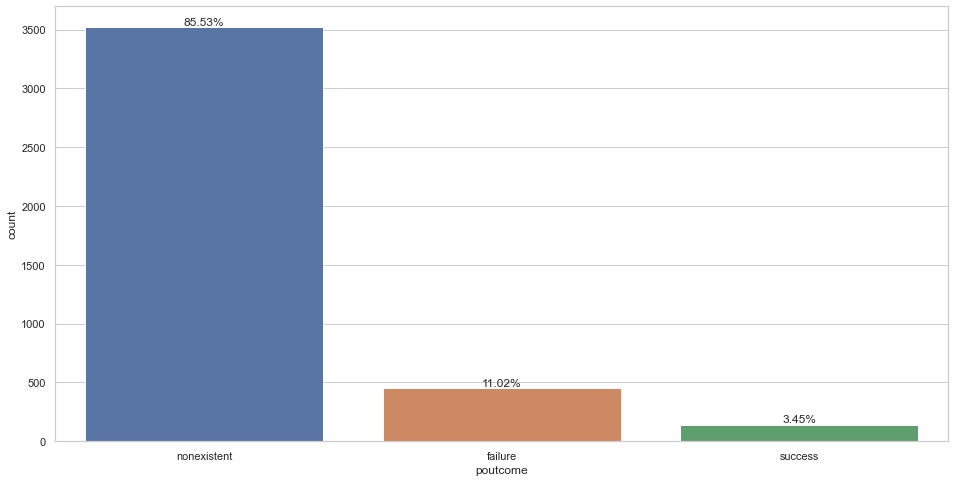

In [120]:
for var in categorical_vars:
    print(var.title())
    fig, ax = plt.subplots(figsize = (16,8))
    sns.countplot(data = df, x = df[var])
    ncount = df.shape[0]
    label_columns(ax)
    plt.show()

Job


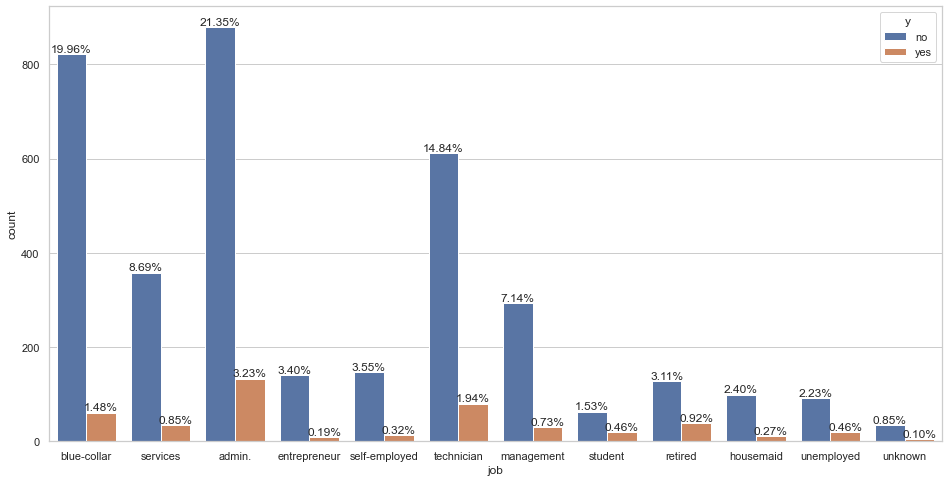

Marital


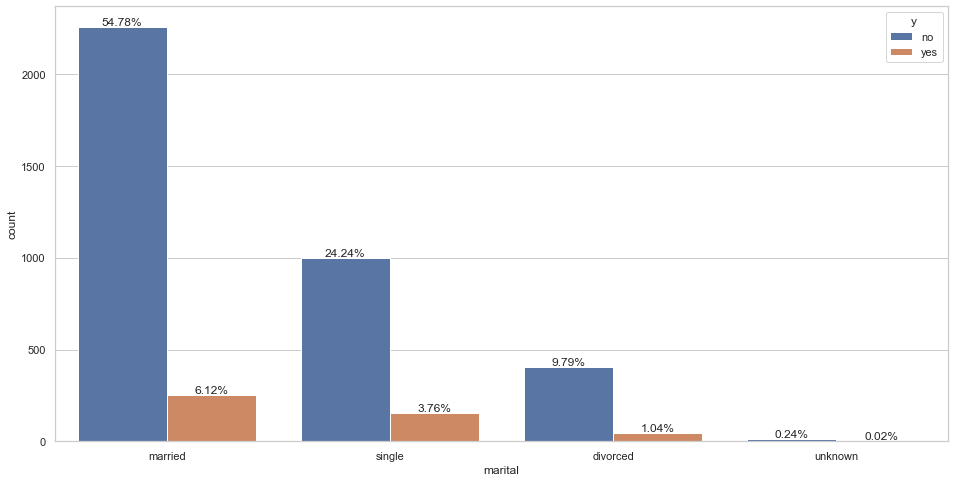

Education


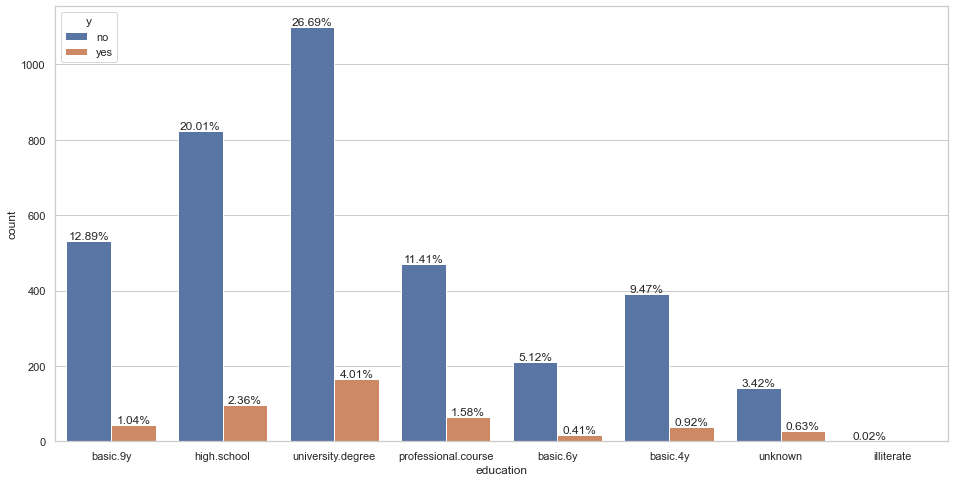

Default


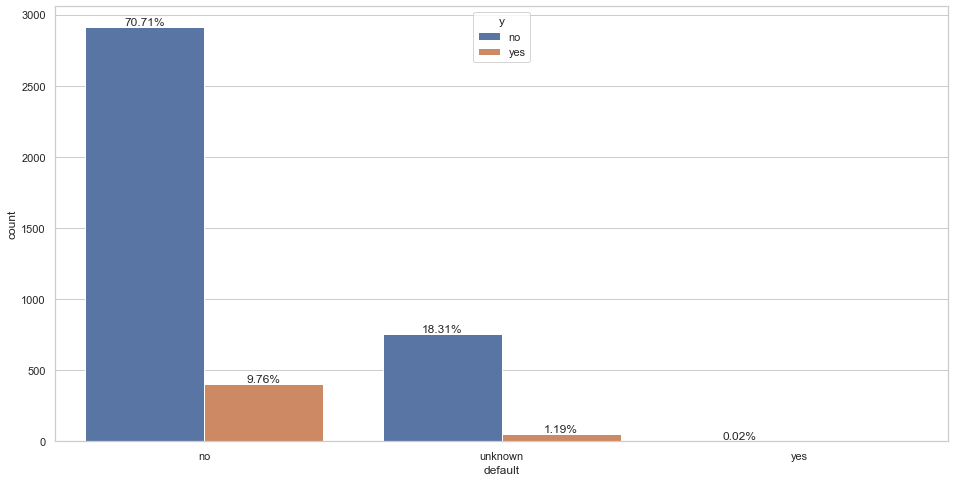

Housing


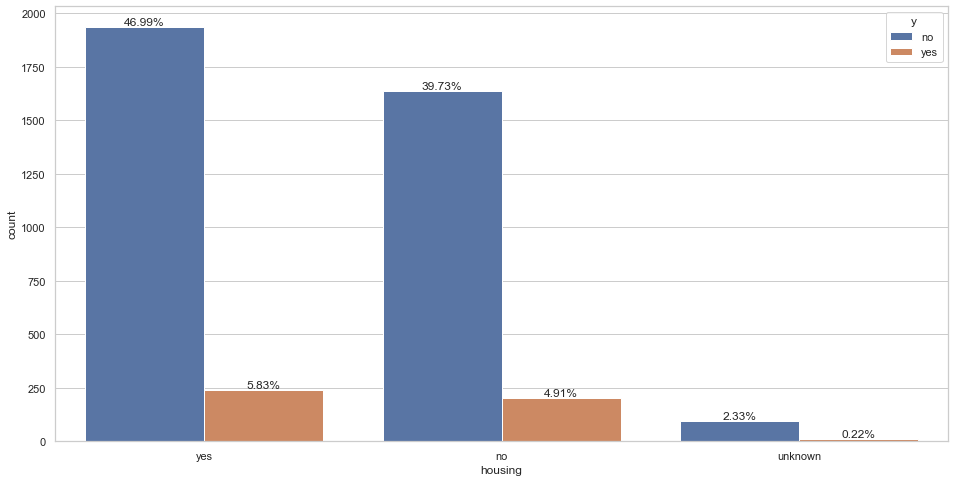

Loan


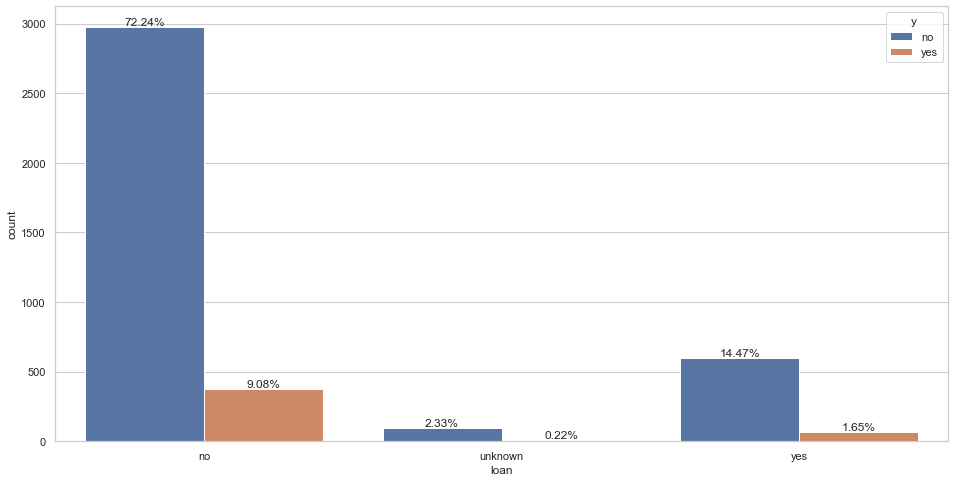

Contact


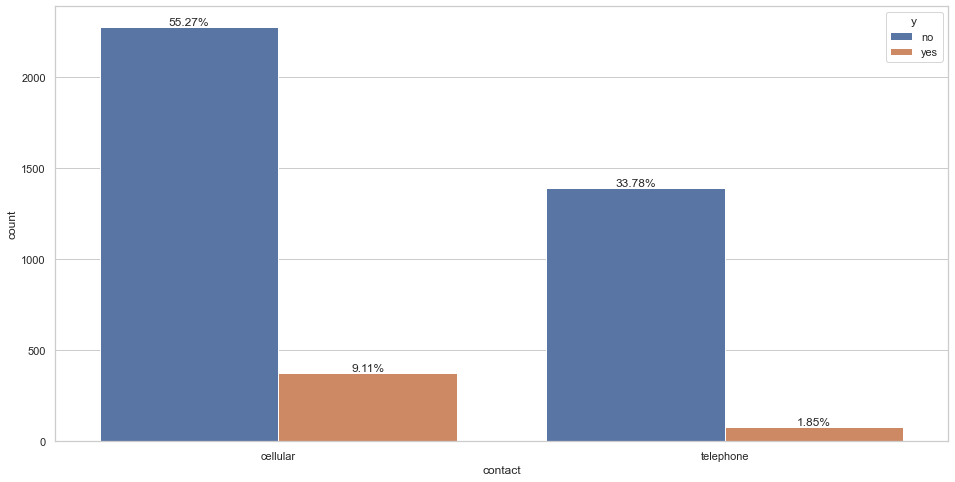

Month


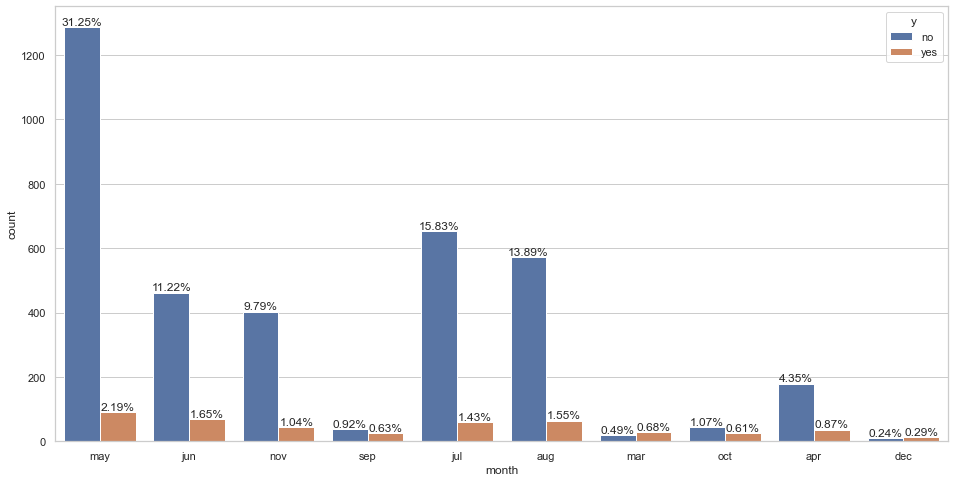

Day_Of_Week


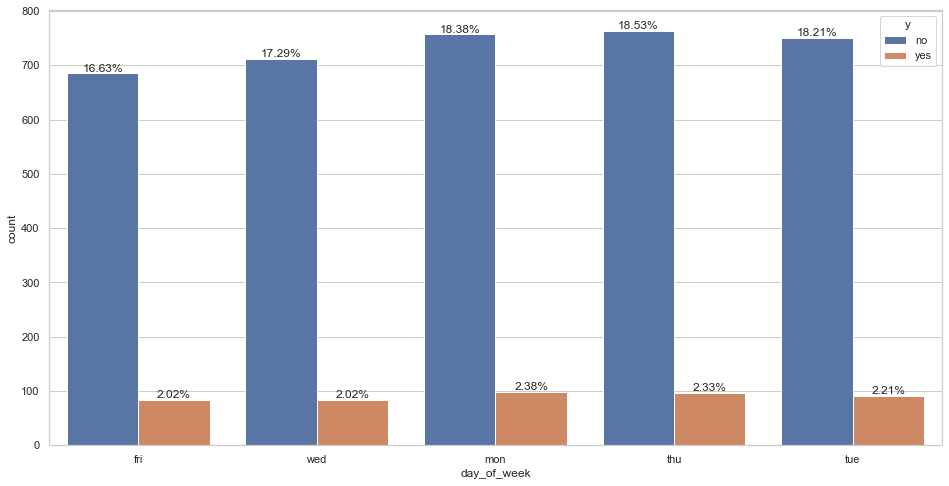

Poutcome


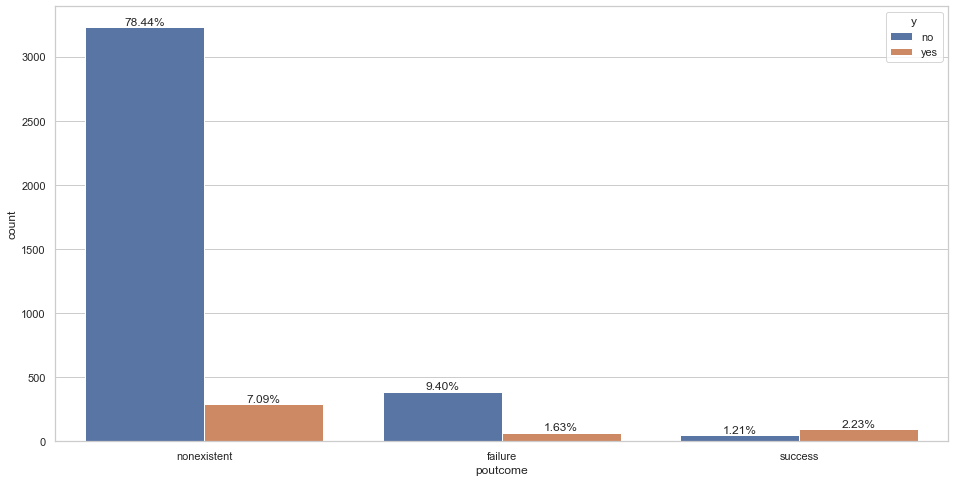

In [121]:
for var in categorical_vars:
    print(var.title())
    fig, ax = plt.subplots(figsize = (16,8))
    sns.countplot(data = df, x = df[var], hue = 'y')
    ncount = df.shape[0]
    label_columns(ax)
    plt.show()

Conclusions:
1. Most of our clients in the database work in administration, blue-collar jobs and as technicians respectively. However, when we compare each sample yeses, we see that we can technicians subscribed more to the term deposits than blue-collars.
2. Our clients are in majority people with university degree and also they have the biggest percent of subscription to term deposits.
3. There is a very small percentage of people who have default credits and this variable is not important for our exit variable y, so we will drop it.
4. Day of the week seems irrelevant for the subscription to the term deposit, so we will drop that column also.

In [122]:
columns_to_drop = ['default','day_of_week']
df.drop(labels=columns_to_drop, axis=1, inplace=True)

In [123]:
categorical_vars.remove('default')
categorical_vars.remove('day_of_week')

Lets take a look now at the linear variables:

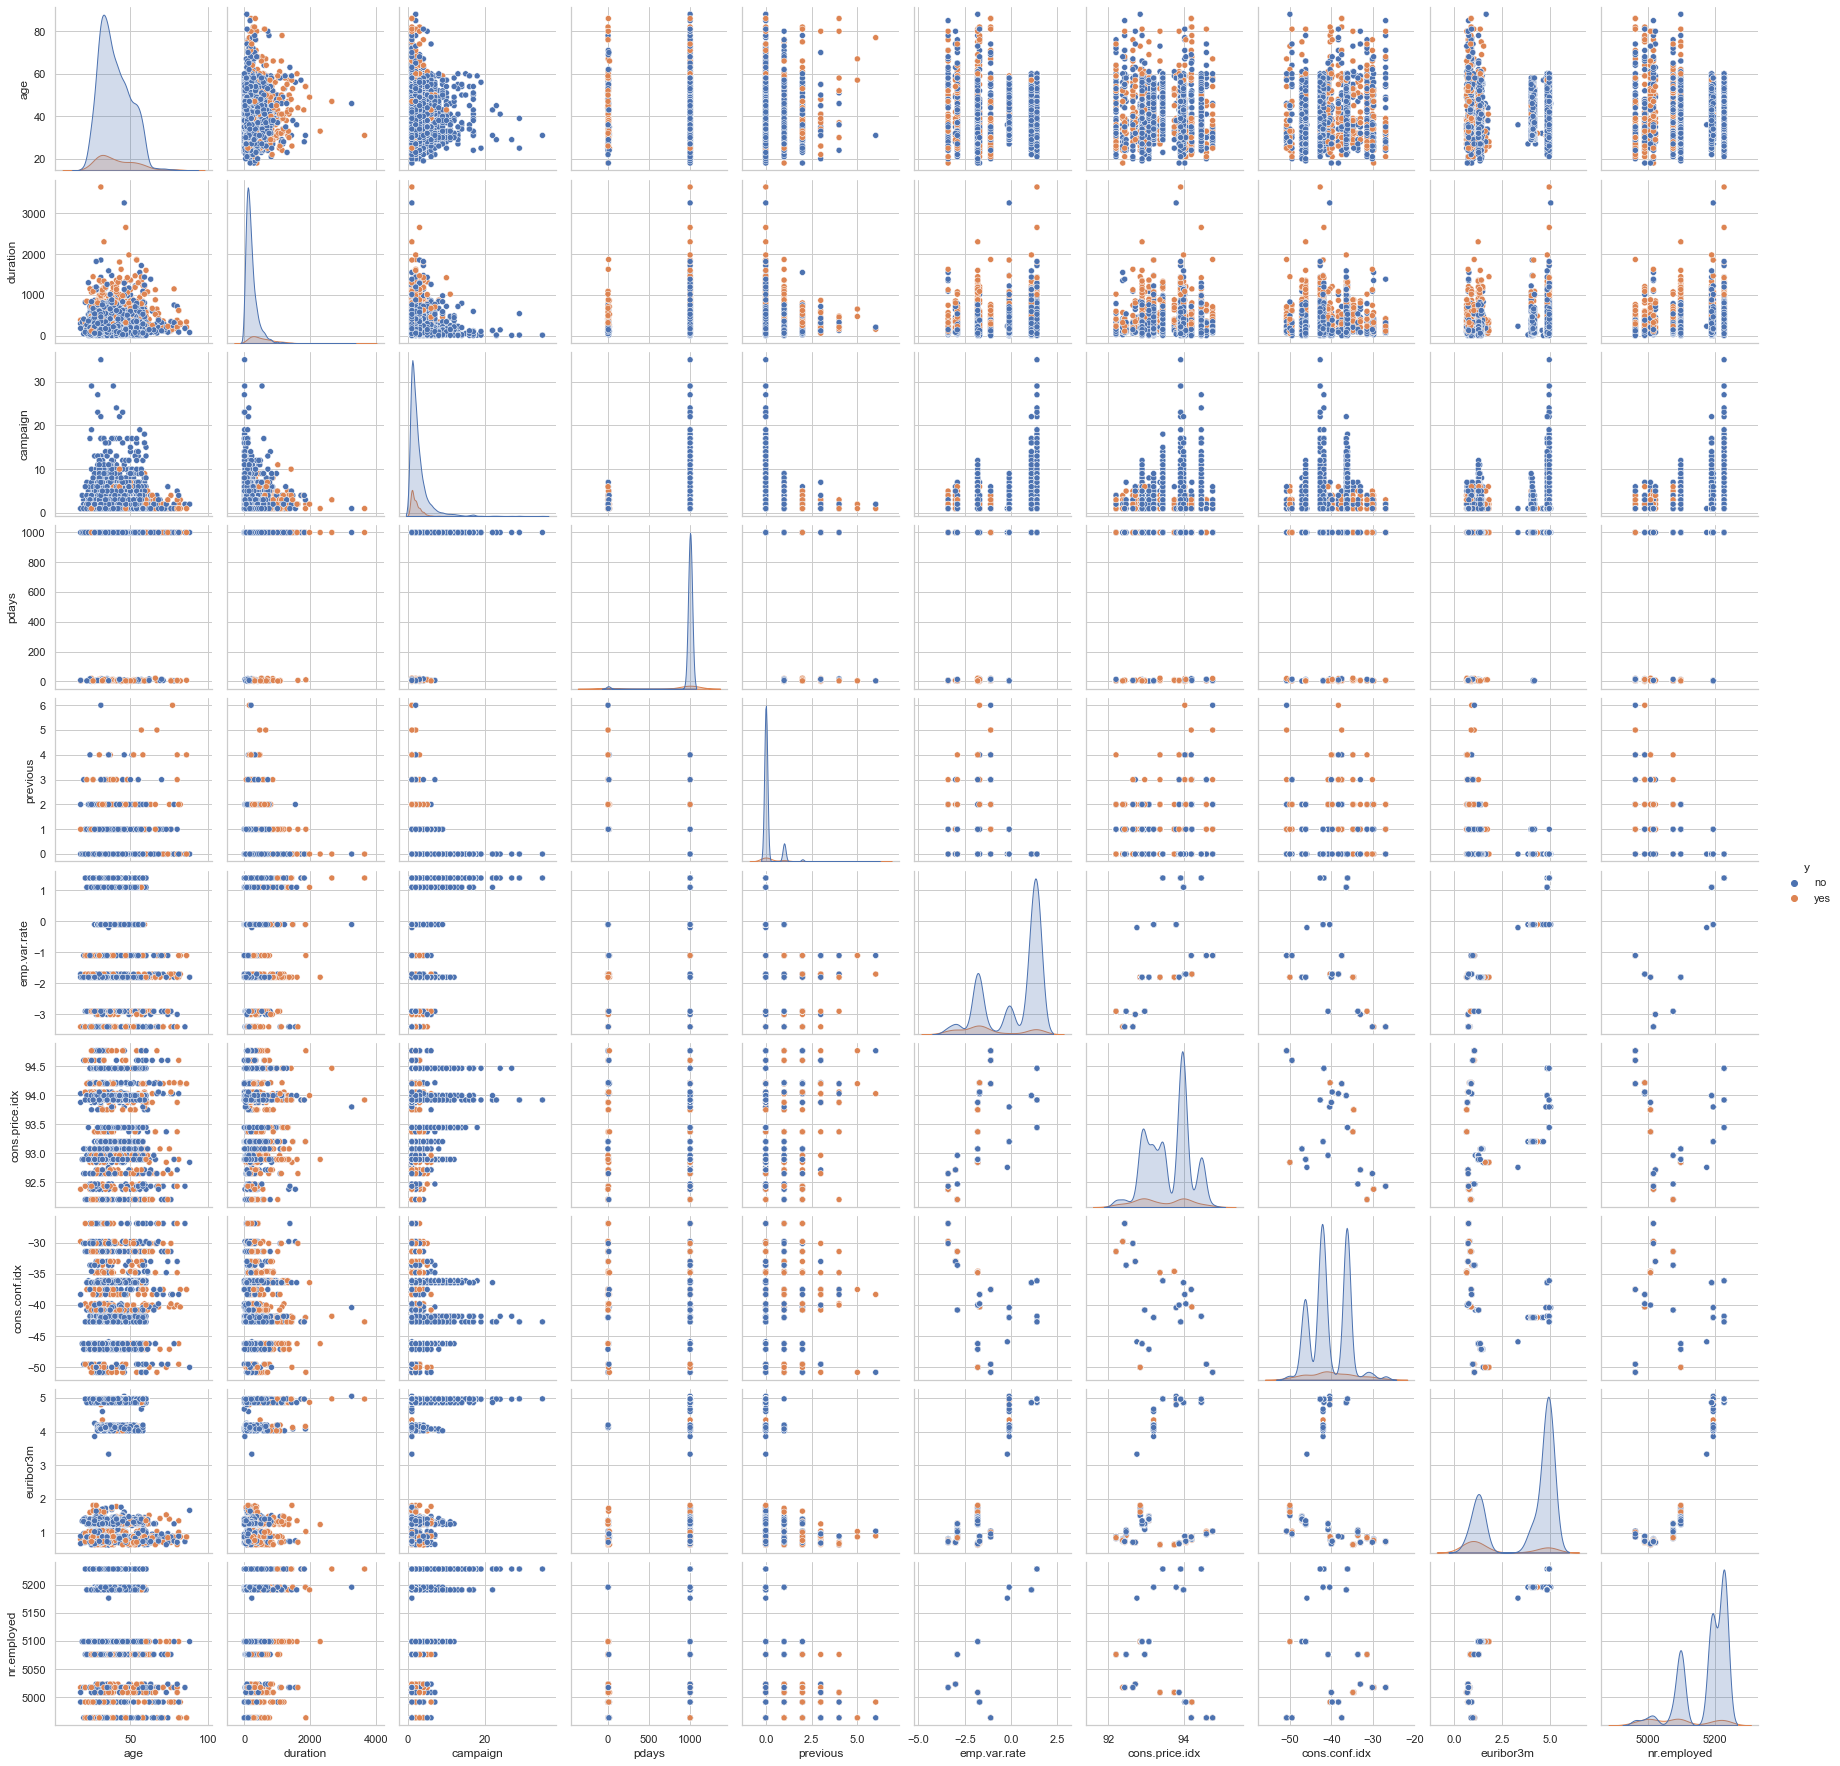

In [124]:
sns.pairplot(data = df, hue = 'y')

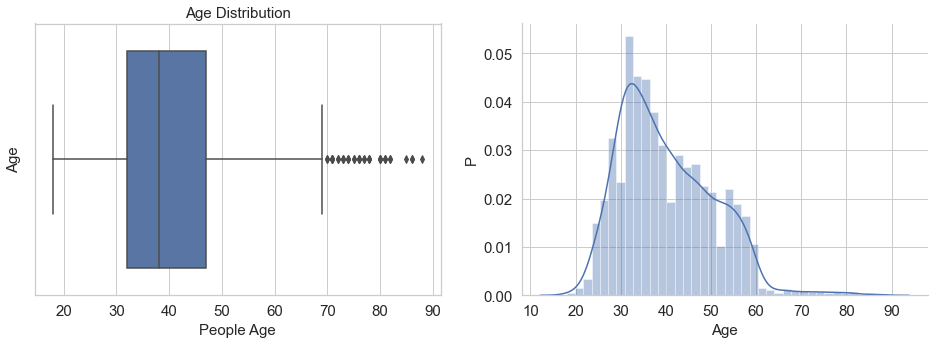

In [125]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 5))
sns.boxplot(x = 'age', data = df, ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('P', fontsize=15)
ax2.tick_params(labelsize=15)

In [126]:
numerical_vars = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]

<AxesSubplot:>

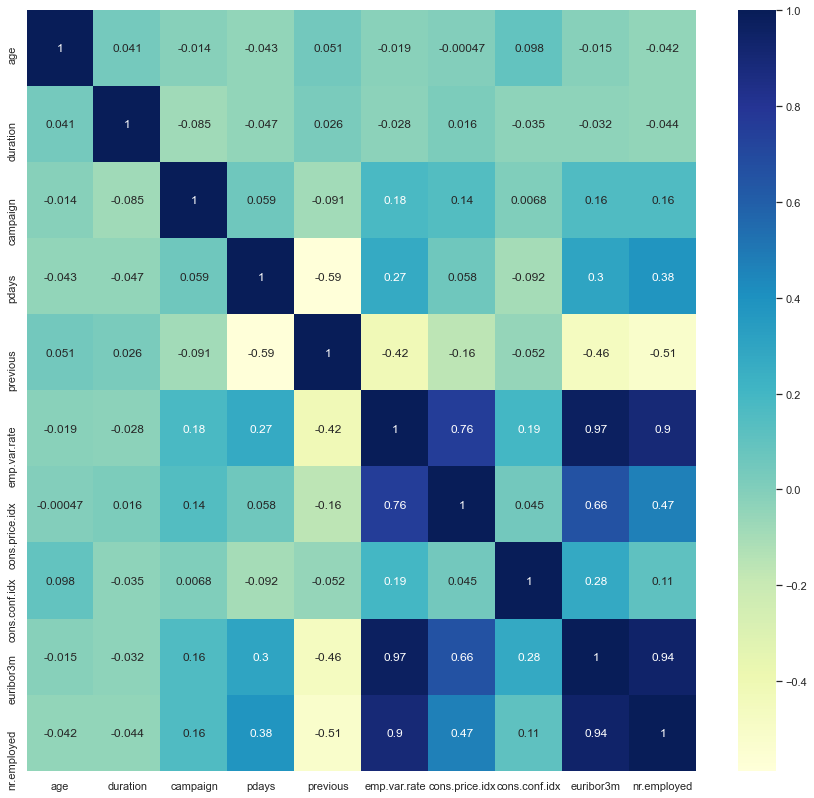

In [127]:
fig, ax = plt.subplots(figsize = (15,14))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', ax = ax)

<AxesSubplot:>

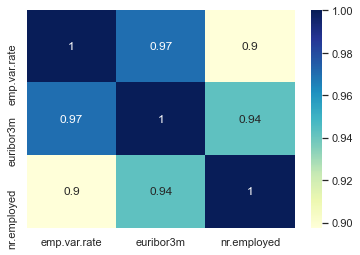

In [128]:
sns.heatmap(df[["emp.var.rate", "euribor3m","nr.employed"]].corr(), annot=True, cmap='YlGnBu')

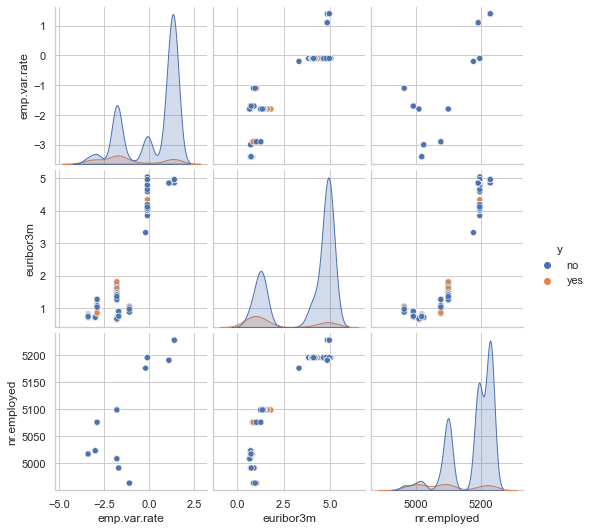

In [129]:
sns.pairplot(data = df[["emp.var.rate", "euribor3m","nr.employed", 'y']], hue = 'y')

Since variables emp.var.rate and nr-employed are highly correlated and also correlated with euribor3, we will try dropping the first two, because Euribor rates are based on the interest rates at which a panel of European banks borrow funds from one another, which seems logically relevant to the problem.
We will also discard duration since it was told that it highly correlates with dependant variable.

In [130]:
cols_to_drop = ['emp.var.rate', 'nr.employed', 'duration']

In [131]:
df.drop(cols_to_drop, axis = 1, inplace=True)
numerical_vars.remove('emp.var.rate')
numerical_vars.remove('nr.employed')

In [132]:
numerical_vars.remove('duration')

In [133]:
numerical_vars

['age',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

Variable: Age


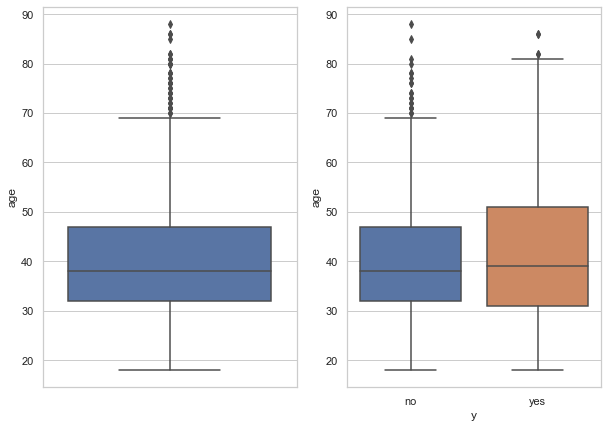

Variable: Campaign


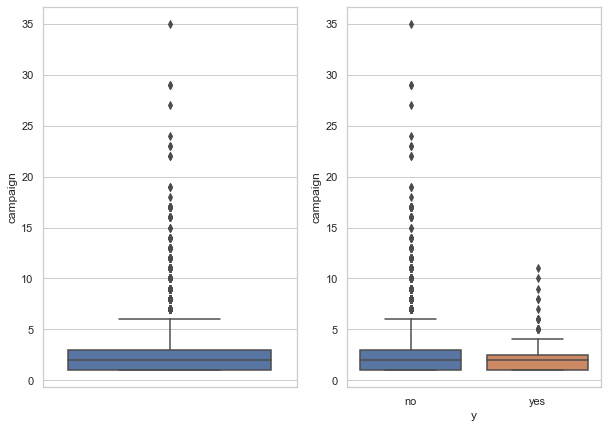

Variable: Pdays


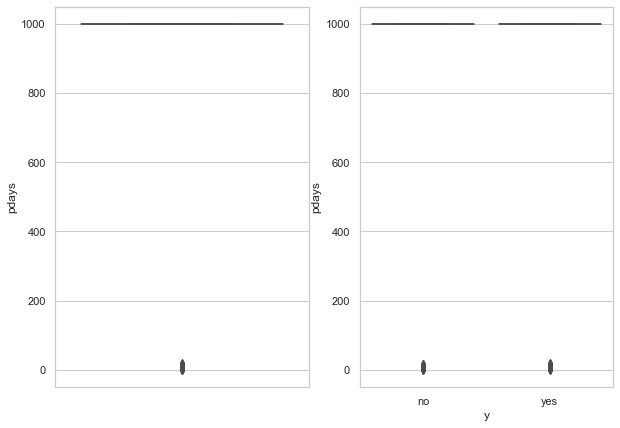

Variable: Previous


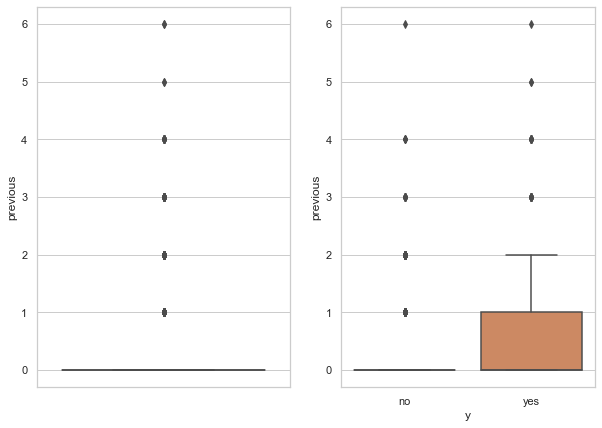

Variable: Cons.Price.Idx


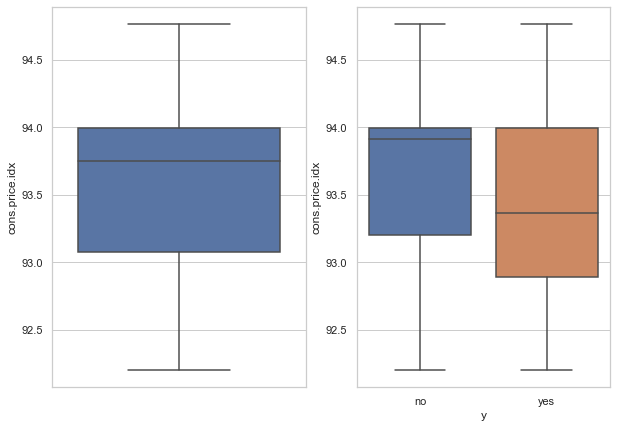

Variable: Cons.Conf.Idx


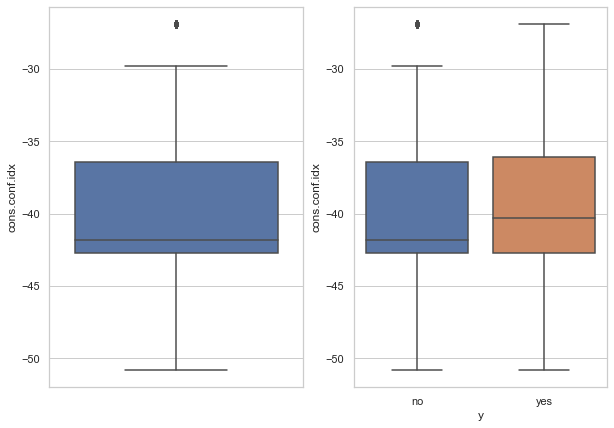

Variable: Euribor3M


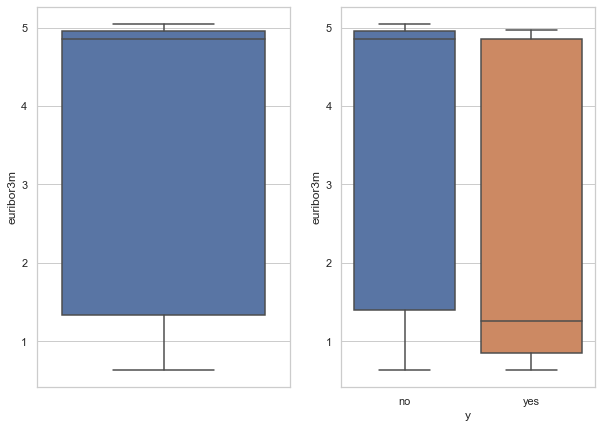

In [134]:
for var in numerical_vars:
    fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 7))
    print(f'Variable: {var.title()}')
    sns.boxplot(data = df, y = var, ax = ax1)
    sns.boxplot(x = df['y'], y = df[var])
    plt.show()


Since we have a small number of clients with pdays actually telling us the number of days that passed since we contacted them about term deposit and more that tell us about clients who we did not contact at all, we will change the variable to 1-were called, 0-weren't called

In [135]:
df.loc[(df.pdays==999),"pdays"]=1
df.loc[(df.pdays!=1),"pdays"]=0

Pdays


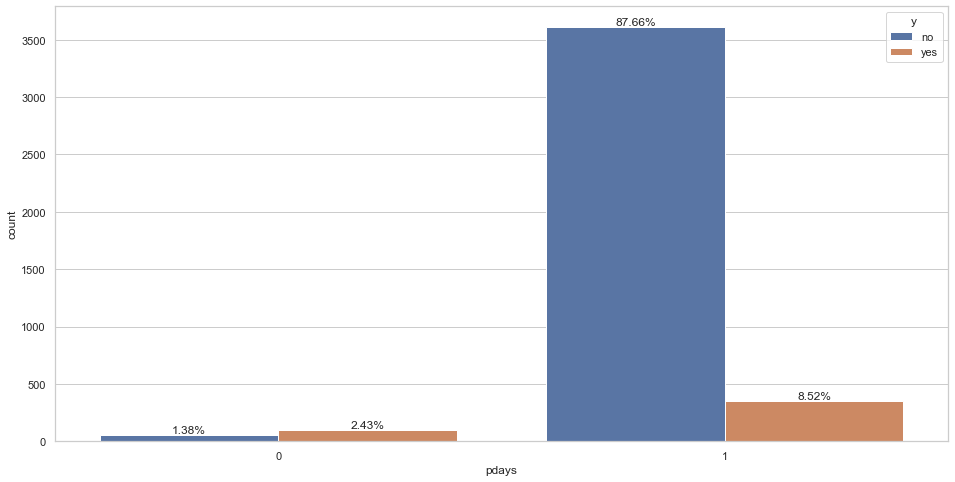

In [136]:
    print('pdays'.title())
    fig, ax = plt.subplots(figsize = (16,8))
    sns.countplot(data = df, x = df['pdays'], hue='y')
    ncount = df.shape[0]
    label_columns(ax)
    plt.show()

In [137]:
numerical_vars.remove('pdays')

In [138]:
categorical_vars.append('pdays')

Outlier detection using interquantile range IQR

In [139]:
outlier_variables = ['age','campaign', 'cons.conf.idx']
outlier_variables

['age', 'campaign', 'cons.conf.idx']

Variable age outlier removal

In [140]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
Q1, Q3

(32.0, 47.0)

In [141]:
IQR = Q3 - Q1
IQR

15.0

In [142]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(9.5, 69.5)

In [143]:
df = df[(df['age'] < upper_limit) & (df['age'] > lower_limit)]

In [144]:
df.shape

(4079, 16)

Variable campaign outlier removal

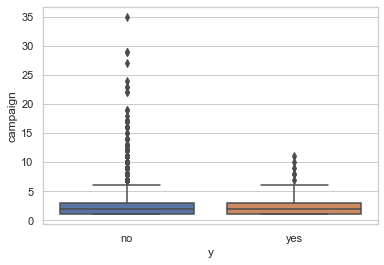

In [145]:
sns.boxplot(data=df, x = 'y', y = 'campaign')
plt.show()

In [146]:
df[(df['campaign'] >= 11) & (df['y'] == 'yes')].shape[0]

1

In [147]:
df.loc[ df['campaign'] > 11, 'campaign'] = 11

In [148]:
df.shape

(4079, 16)

In [149]:
Q1 = df['cons.conf.idx'].quantile(0.25)
Q3 = df['cons.conf.idx'].quantile(0.75)
Q1, Q3
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(-52.150000000000006, -26.949999999999992)

In [150]:
df = df[(df['cons.conf.idx'] < upper_limit) & (df['cons.conf.idx'] > lower_limit)]

In [151]:
df.shape

(4039, 16)

Variable: Age


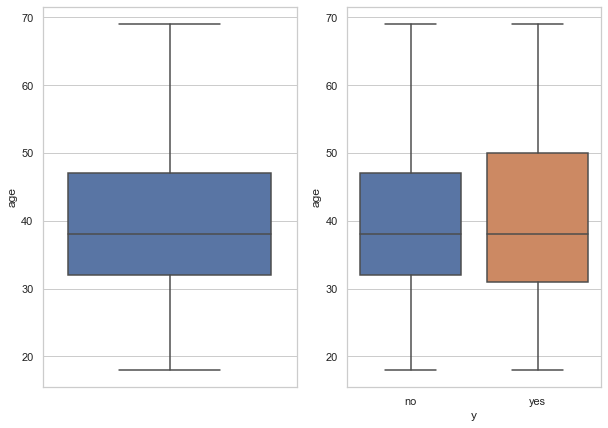

Variable: Campaign


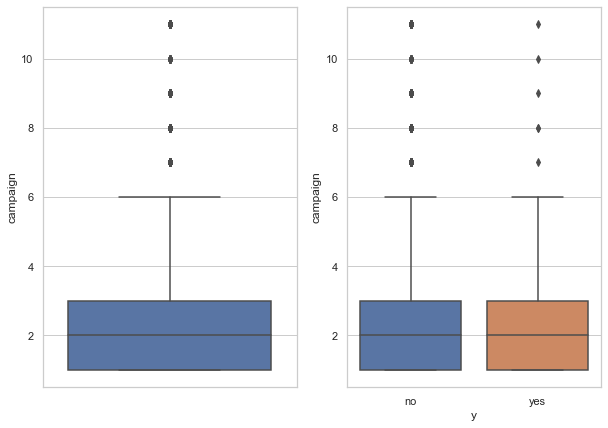

Variable: Previous


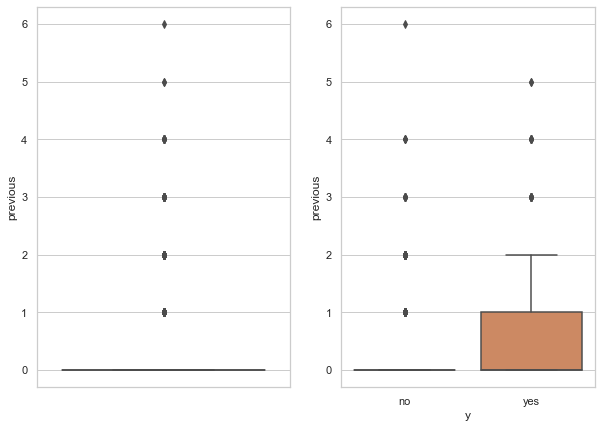

Variable: Cons.Price.Idx


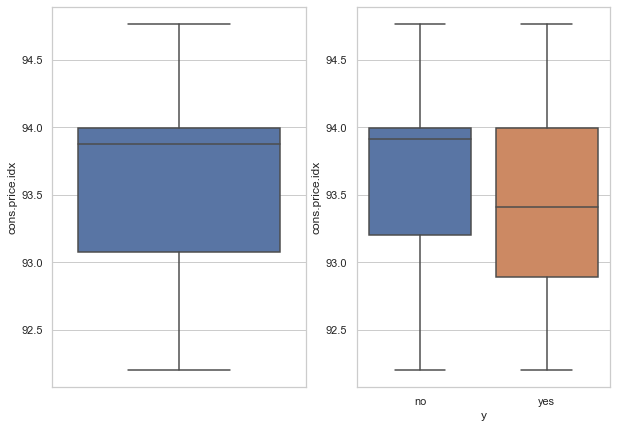

Variable: Cons.Conf.Idx


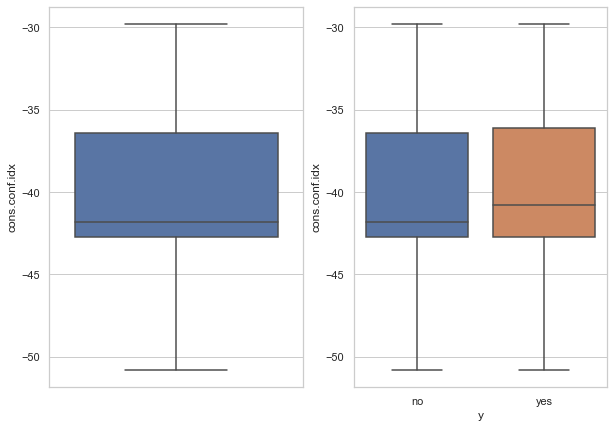

Variable: Euribor3M


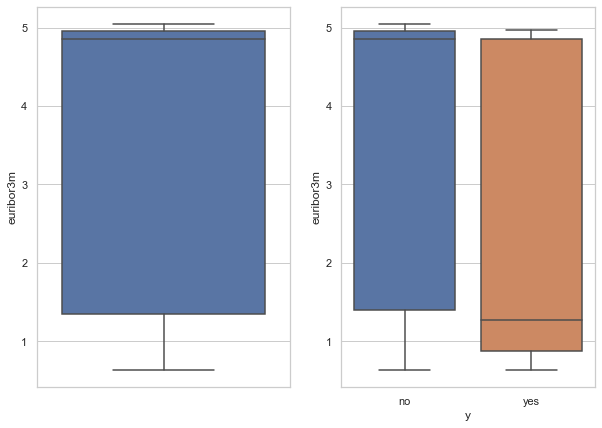

In [152]:
for var in numerical_vars:
    fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 7))
    print(f'Variable: {var.title()}')
    sns.boxplot(data = df, y = var, ax = ax1)
    sns.boxplot(x = df['y'], y = df[var])
    plt.show()

In [153]:
df.describe()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
count,4039.000000,4034.000000,4039.000000,4037.000000,4037.000000,4039.000000,4037.000000
mean,39.759842,2.468270,0.964595,0.180580,93.593279,-40.656722,3.676025
std,9.663930,2.111241,0.184824,0.519529,0.567344,4.376132,1.705172
min,18.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.635000
25%,32.000000,1.000000,1.000000,0.000000,93.075000,-42.700000,1.344000
50%,38.000000,2.000000,1.000000,0.000000,93.876000,-41.800000,4.857000
75%,47.000000,3.000000,1.000000,0.000000,93.994000,-36.400000,4.961000
max,69.000000,11.000000,1.000000,6.000000,94.767000,-29.800000,5.045000


In [154]:
from sklearn.model_selection import train_test_split
X = df.drop("y", axis=1)
y=df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape , X_test.shape , y_train.shape, y_test.shape

((3029, 15), (1010, 15), (3029,), (1010,))

In [155]:
X_train.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
campaign          4
pdays             0
previous          2
poutcome          0
cons.price.idx    2
cons.conf.idx     0
euribor3m         2
dtype: int64

In [156]:
X_train.isin(['unknown']).sum()

age                 0
job                30
marital             8
education         121
housing            73
loan               73
contact             0
month               0
campaign            0
pdays               0
previous            0
poutcome            0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
dtype: int64

In [157]:
X_test.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
campaign          1
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
dtype: int64

In [158]:
X_test.isin(['unknown']).sum()

age                0
job                9
marital            3
education         41
housing           31
loan              31
contact            0
month              0
campaign           0
pdays              0
previous           0
poutcome           0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
dtype: int64

In [167]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [168]:
imp_mean.fit(X_train[numerical_vars])
X_train[numerical_vars] = imp_mean.transform(X_train[numerical_vars])

In [169]:
X_train.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
dtype: int64

In [170]:
X_test[numerical_vars] = imp_mean.transform(X_test[numerical_vars])

In [171]:
X_test.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
dtype: int64

In [172]:
df.head()

,age,job,marital,education,housing,loan,contact,month,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,2.0,1,0.0,nonexistent,92.893,-46.2,1.313,no
1,39,services,single,high.school,no,no,telephone,may,4.0,1,0.0,nonexistent,93.994,-36.4,4.855,no
2,25,services,married,high.school,yes,no,telephone,jun,1.0,1,0.0,nonexistent,94.465,-41.8,4.962,no
3,38,services,married,basic.9y,unknown,unknown,telephone,jun,3.0,1,0.0,nonexistent,94.465,-41.8,4.959,no
4,47,admin.,married,university.degree,yes,no,cellular,nov,1.0,1,0.0,nonexistent,93.200,-42.0,4.191,no


In [173]:
from sklearn.preprocessing import LabelEncoder

In [174]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [175]:
y_test = le.transform(y_test)

In [176]:
!pip install category_encoders

def binaryEncoding(df,column):
    from category_encoders import BinaryEncoder
    encoder=BinaryEncoder(cols=[column])
    df=encoder.fit_transform(df)
    return df

def oneHotEncoding(df,column):
    from category_encoders import OneHotEncoder
    encoder=OneHotEncoder(cols=[column])
    df = encoder.fit_transform(df)
    return df

def encodingForCategoricalFeature(df,categoricalColumns):
    for element in categoricalColumns:
        if len(df[element].unique())<=5:
            df=oneHotEncoding(df,element)
        else:
            df=binaryEncoding(df,element)
    return df

X_train = encodingForCategoricalFeature(X_train, categorical_vars)
X_test = encodingForCategoricalFeature(X_test, categorical_vars)

In [177]:
X_train.head()

,age,job_0,job_1,job_2,job_3,marital_1,marital_2,marital_3,marital_4,education_0,education_1,education_2,education_3,housing_1,housing_2,housing_3,loan_1,loan_2,loan_3,contact_1,contact_2,month_0,month_1,month_2,month_3,campaign,pdays_1,pdays_2,previous,poutcome_1,poutcome_2,poutcome_3,cons.price.idx,cons.conf.idx,euribor3m
3337,59.0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,3.0,1,0,0.0,1,0,0,93.918,-42.7,4.968
2224,32.0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,3.0,1,0,0.0,1,0,0,94.465,-41.8,4.866
608,54.0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,0,2.0,1,0,0.0,1,0,0,94.465,-41.8,4.958
3325,27.0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,1.0,1,0,0.0,1,0,0,93.075,-47.1,1.445
1453,40.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1.0,1,0,0.0,1,0,0,93.994,-36.4,4.856


In [190]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[numerical_vars] = scaler.fit_transform(X = X_train[numerical_vars], y = None)

In [191]:
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [192]:
X_train.head()

,age,job_0,job_1,job_2,job_3,marital_1,marital_2,marital_3,marital_4,education_0,education_1,education_2,education_3,housing_1,housing_2,housing_3,loan_1,loan_2,loan_3,contact_1,contact_2,month_0,month_1,month_2,month_3,campaign,pdays_1,pdays_2,previous,poutcome_1,poutcome_2,poutcome_3,cons.price.idx,cons.conf.idx,euribor3m
3337,0.803922,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0.2,1,0,0.0,1,0,0,0.669135,0.385714,0.999539
2224,0.274510,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0.2,1,0,0.0,1,0,0,0.882307,0.428571,0.976009
608,0.705882,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,0,0.1,1,0,0.0,1,0,0,0.882307,0.428571,0.997232
3325,0.176471,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0.0,1,0,0.0,1,0,0,0.340608,0.176190,0.186851
1453,0.431373,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.0,1,0,0.0,1,0,0,0.698753,0.685714,0.973702


In [193]:
X_test.head()

,age,job_0,job_1,job_2,job_3,marital_1,marital_2,marital_3,marital_4,education_0,education_1,education_2,housing_1,housing_2,housing_3,loan_1,loan_2,loan_3,contact_1,contact_2,month_0,month_1,month_2,month_3,campaign,pdays_1,pdays_2,previous,poutcome_1,poutcome_2,poutcome_3,cons.price.idx,cons.conf.idx,euribor3m
3196,0.254902,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0.1,1,0,0.0,1,0,0,0.882307,0.428571,0.997924
154,0.274510,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0.0,1,0,0.0,1,0,0,0.484412,0.700000,0.998847
2063,0.686275,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1,1,0.3,1,0,0.0,1,0,0,0.669135,0.385714,0.997924
2492,0.235294,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0.1,1,0,0.0,1,0,0,0.698753,0.685714,0.975548
3260,0.274510,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0.1,1,0,0.0,1,0,0,0.269680,0.219048,0.153172


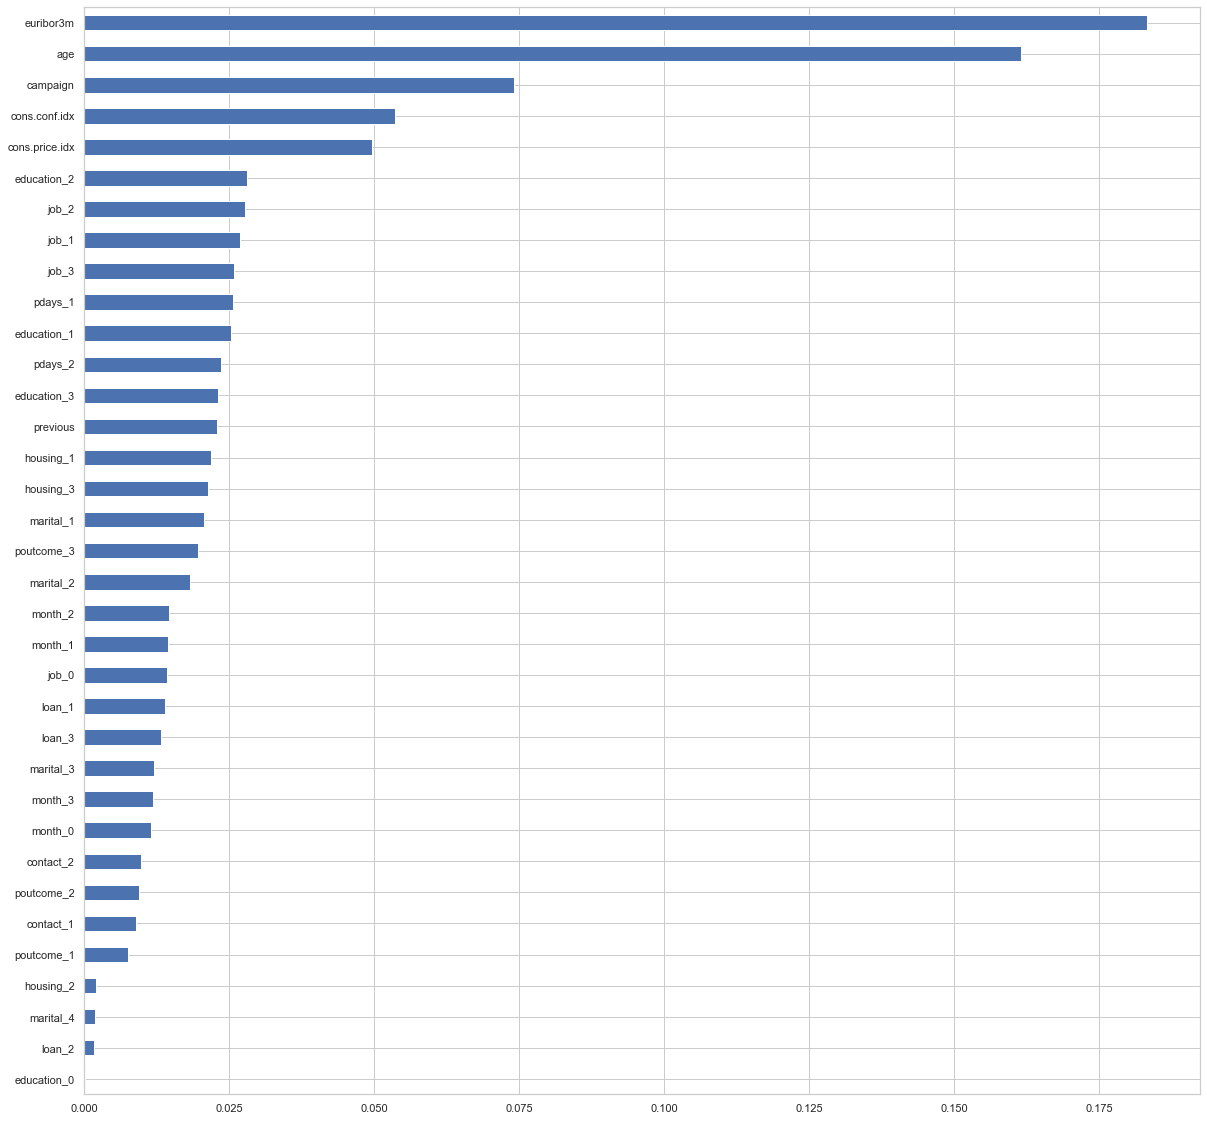

In [194]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',figsize=(20,20))
plt.show();

In [195]:
def models(X_train,y_train):
    
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
    knn.fit(X_train,y_train)
    
    from sklearn.svm import SVC
    svc_lin=SVC(kernel="linear",random_state=0,probability=True)
    svc_lin.fit(X_train,y_train)
    
    svc_rbf=SVC(kernel="rbf",random_state=0,probability=True)
    svc_rbf.fit(X_train,y_train)
    
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
    tree.fit(X_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
    forest.fit(X_train,y_train)
    
    from sklearn.experimental import enable_hist_gradient_boosting
    from sklearn.ensemble import HistGradientBoostingClassifier
    histgrad=HistGradientBoostingClassifier()
    histgrad.fit(X_train,y_train)
    
    from sklearn.ensemble import GradientBoostingClassifier
    gbm=GradientBoostingClassifier()
    gbm.fit(X_train,y_train)
    
    from xgboost import XGBClassifier
    xgboost=XGBClassifier()
    xgboost.fit(X_train,y_train)
    

    #print the training scores for each model
    print('[0] Logistic Regression Training Score:',log.score(X_train,y_train))
    print('\n[1] K Neighbors Training Score:',knn.score(X_train,y_train))
    print('\n[2] SVC Linear Training Score:',svc_lin.score(X_train,y_train))
    print('\n[3] SVC RBF Training Score:',svc_rbf.score(X_train,y_train))
    print('\n[4] Gaussian Training Score:',gauss.score(X_train,y_train))
    print('\n[5] Decision Tree Training Score:',tree.score(X_train,y_train))
    print('\n[6] Random Forest Training Score:',forest.score(X_train,y_train))
    print('\n[7] Hist Gradient Boosting Training Score:',histgrad.score(X_train,y_train))
    print('\n[8] Gradient Boosting Training Score:',gbm.score(X_train,y_train))
    print('\n[9] XGBoost Training Score:',xgboost.score(X_train,y_train))
    
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest,histgrad,gbm,xgboost

log,knn,svc_lin,svc_rbf,gauss,tree,forest,histgrad,gbm,xgboost = models(X_train, y_train)

[0] Logistic Regression Training Score: 0.8986464179597227

[1] K Neighbors Training Score: 0.9059095411026742

[2] SVC Linear Training Score: 0.8983162759986795

[3] SVC RBF Training Score: 0.9032684054143282

[4] Gaussian Training Score: 0.7401782766589634

[5] Decision Tree Training Score: 0.9993397160779135

[6] Random Forest Training Score: 0.9831627599867944

[7] Hist Gradient Boosting Training Score: 0.9636843842852426

[8] Gradient Boosting Training Score: 0.9250577748431825

[9] XGBoost Training Score: 0.9838230439088809
